# **Morning Practical 1**
Welcome to the practical exercises. Here, you're going to define your own hypothesis, mean-squared error, and gradient descent functions. First, run the cell below to set things up.

In [2]:
#run this cell to set things up
import ipywidgets as widgets, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from IPython.display import display, Markdown
%matplotlib notebook

## Two multiple choice questions
Let's start things off with 2 multiple choice questions. Run each code cell below in turn to get the questions

In [3]:
%run -i InteractiveQuestion1.py

Which of the below best characterises an unsupervised learning problem?



interactive(children=(Checkbox(value=False, description='You want to know whether you can predict blood glucos…

During the lectures, we have shown that gradient descent can minimise the cost function. Of course, that assumes that the minimum is reachable. We won't have to worry about this today, because linear functions always have a global minimum. What do you think would happen if you tried gradient descent in the picture on the right below? <br>
![gradientDescentImage.jpg](gradientDescentImage.jpg) [source](https://blog.paperspace.com/intro-to-optimization-in-deep-learning-gradient-descent/)

In [4]:
%run -i InteractiveQuestion2.py

What do you think would happen if you tried gradient descent in the picture on the right above?



interactive(children=(Checkbox(value=False, description='On the right, as on the left, gradient descent will c…

## Loading sample data
Let's load some sample data and visualise it. We use matplotlib, numpy, and pandas to do this. Pandas is used to make so-called DataFrames, which are tables that usually have observations in the rows and features or properties in the columns. Unlike matrices, they can contain many data types (i.e. one column is a descriptive string, the other is numeric, etc.). Numpy is a library for working with numbers in Python. It comes with a data type called arrays, which can also have rows and columns. Numpy will be used to perform calculations for fitting ML models when necessary. Numpy and Pandas both have great documentation ([Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html), [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)), so be sure to search online when you need to use functions from these packages during the exercises and it isn't working out.

<IPython.core.display.Javascript object>


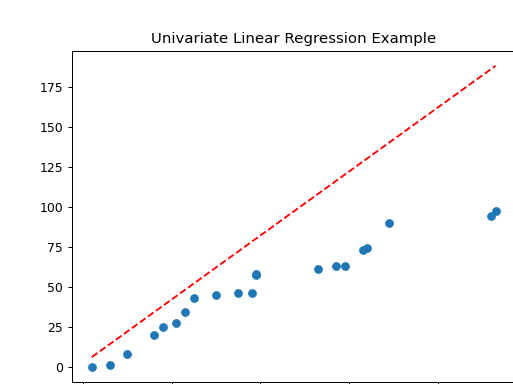

In [6]:
data = pd.read_csv("sampleDataLinearRegression.csv", header= None)
data.columns = ["x", "y"]
startTheta = np.array([2,2])


fig, ax = plt.subplots(num = "linearRegressionPlot")
scatter = ax.scatter(data["x"], data["y"])
regressionLine, = ax.plot(data["x"], startTheta[0] + startTheta[1] * data["x"], color = 'red', linestyle = "dashed")
plt.title("Univariate Linear Regression Example")
plt.show()

## Writing your own MSE function
During the lectures you just saw, we discussed a widely-used cost function, the mean-squared error or MSE. Write your own MSE function. It should take a DataFrame with observations in the rows and features/outcomes in the columns, and an array of thetas. Assume univariate linear regression, that is, there is only $\theta_0$ and $\theta_1$ to worry about. Call the function `MyMSE()`.
* Hint: you can use `def FunctionName(arg1, arg2, arg3):` to define a function. In this case, use `def MyMSE(dataframe, thetas):`.
* Hint: loop over all x values, calculating the prediction for each using the thetas that you also supply as an argument. Then simply take the square difference with the corresponding y value. Use the DataFrame method `.iterrows()` for this (although it can also be done differently, up to you!).
* Hint: Don't forget to take the mean (for example by dividing by `len(DataFrame)`)
* Hint: DataFrame giving you grief? Pandas has excellent documentation, and StackOverflow is always at the ready. Duckduckgo (or Google, if you must) is your friend!

In [7]:
#answer
def MyMSE(dataframe, thetas):
    totalSumSquares = 0
    for index, rowData in dataframe.iterrows():
        prediction = thetas[0] + thetas[1] * rowData["x"]
        squareError = (prediction-rowData["y"])**2
        totalSumSquares += squareError
    meanSquaredError = totalSumSquares/len(dataframe) 
    return meanSquaredError

    




## Applying your MSE function
Now let's use your MSE function to calculate the MSE for different $\theta_0$ and $\theta_1$ values and see the corresponding regression line and contour plot of the cost function. Complete the code in the cell below by replacing all instances of `MyMSE()` with your MSE function name if you decided to be cheeky and <i> not </i> name it `MyMSE()`. Drag the sliders to see what values lead to the lowest mean-squared error. <br> <br>
Note: since the cost function is calculated many times for many different thetas to make a contour plot, this will take some time!

<IPython.core.display.Javascript object>


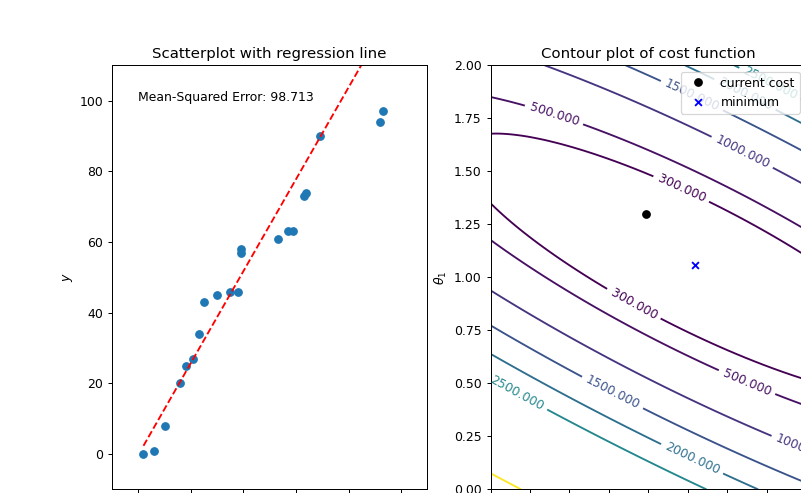

interactive(children=(FloatSlider(value=2.0, description='$θ_0$', max=15.0, min=-5.0, step=0.25), FloatSlider(…

<function __main__.update(thetaZero=2, thetaOne=2)>

In [8]:
#answer: 
currentMSE = MyMSE(data, startTheta)

#this sets up the regression plot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,6.15))
scatter = ax1.scatter(data["x"], data["y"])
regressionLine, = ax1.plot(data["x"], startTheta[0] + startTheta[1] * data["x"]
                          , color = 'red', linestyle = "dashed")
ax1.text(0, 100, "Mean-Squared Error: " + str(currentMSE))
ax1.set_xlim([-10,110])
ax1.set_ylim([-10,110])
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.set_title("Scatterplot with regression line")

#this sets up a contour plot of the cost function.
ax2.set_ylabel("$θ_1$")
ax2.set_xlabel("$θ_0$")
ax2.set_title("Contour plot of cost function")

#calculate cost values for many different theta0, theta1 combinations
theta0Vals =  np.linspace(-20, 20, 120)
theta1Vals =  np.linspace(0, 2, 120)
X, Y = np.meshgrid(theta0Vals, theta1Vals)
JVals = np.zeros(np.shape(X))
for i in range(0,len(theta0Vals)):
    for j in range(0,len(theta1Vals)):
        JVals[i,j] = MyMSE(data, np.array([X[i,j], Y[i,j]]))

#make a contour plot based on these
ax2.set_ylim([np.min(theta1Vals),np.max(theta1Vals)])
ax2.set_xlim([np.min(theta0Vals),np.max(theta0Vals)])
minimum = ax2.scatter(X[JVals == np.min(JVals)], Y[JVals == np.min(JVals)],
                      color = "blue", label = "minimum", marker = "x",
                      s = 30)
thetaCoordinate = ax2.plot(2, 2, color = "black", label = "current cost", linestyle = "", marker = "o")
contour = ax2.contour(theta0Vals,theta1Vals,JVals, levels = [300, 500, 1000, 1500, 2000, 2500, 5000])
ax2.clabel(contour)
ax2.legend()


#this defines a function that updates the plot based on the theta values in the sliders        
def update(thetaZero = startTheta[0], thetaOne = startTheta[1]):
    MSE = MyMSE(data, np.array([thetaZero, thetaOne]))
    ax1.texts[-1].set_text("Mean-Squared Error: " + str(round(MSE, 4)))
    regressionLine.set_ydata(thetaZero + thetaOne *  regressionLine.get_xdata())
    thetaCoordinate[0].set_xdata(thetaZero)
    thetaCoordinate[0].set_ydata(thetaOne)
    
    fig.canvas.draw()

#this displays the sliders  
thetaZero = widgets.FloatSlider(min=-5, max=15, step=0.25, value=startTheta[0], description = "$θ_0$")
thetaOne  = widgets.FloatSlider(min=-5, max=5, step=0.1, value=startTheta[1], description = "$θ_1$")
widgets.interact(update, thetaZero = thetaZero,
                thetaOne = thetaOne)
    




## 3D surface plot of the cost function
Besides the contour plot, you can also look at a surface plot of the cost function. This will show the surface along which we use gradient descent, with its calculation of partial derivatives, to find the direction of steepest descent at any point along our path. Have a look at the surface below. You can rotate it by dragging with the mouse, and change the current cost by changing the theta parameters as above!
<br> <br>

In [9]:
def updateSurface(thetaZeroSurf, thetaOneSurf):
    fig3, ax3 = plt.subplots()

    ax3 = plt.axes(projection='3d')
    ax3.plot_surface(X, Y, JVals ,cmap='viridis', edgecolor='none', alpha = 0.5)#, vmax= 35000)
    #scatterPoint = ax3.scatter(thetaZero.value,thetaOne.value,MyMSE(xData, yData,
    #                                                 np.array([thetaZero.value, thetaOne.value])))
    ax3.set_title('Surface plot')
    ax3.set_xlabel("theta0")
    ax3.set_ylabel("theta1")
    ax3.set_zlabel("Mean-squared error \n (J($θ_0,θ_1$))")
    ax3.set_zlim([0,5000])
    ax3.set_xlim([-15,15])
    ax3.set_ylim([0,3.5])
    ax3.scatter(thetaZeroSurf,thetaOneSurf,MyMSE(data,
                                                 np.array([thetaZeroSurf, thetaOneSurf])))
    fig3.canvas.draw()

 

thetaZero1 = widgets.FloatSlider(min=-5, max=15, step=1, value=5,
                                 description = "$θ_0$", continuous_update = False)
thetaOne1  = widgets.FloatSlider(min=0.5, max=3.5, step=0.5, value=2.0,
                                 description = "$θ_1$", continuous_update = False)

widgets.interactive(updateSurface,
                   thetaZeroSurf = thetaZero1, thetaOneSurf = thetaOne1)






interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='$θ_0$', max=15.0, min=-5.0,…



## Defining a separate univariate hypothesis function
Now that you've seen how the cost function works, let's get to programming it in a more modular way. First, we'll update the MSE function to call a specific hypothesis function. This provides extendability: later on we'll make sure that the MSE function works with any hypothesis function, and then you can simply supply the hypothesis function you'll be using as an argument! For now, though, just do the below:
* Write the univariate regression hypothesis as a function that takes in a data point x  and an array or list of two thetas and returns the predicted value. Call this function `univariateHypothesis`.
* Update the MSE function to use this hypothesis.

<br>
<b> Hints </b>

* Updating `MyMSE` requires only a small change: the prediction step, which should not hardcode the hypothesis function but just call the pre-defined `univariateHypothesis` function. <br>

In [11]:
#Answer:

def univariateHypothesis(x, thetas):
    predict = thetas[0] + thetas[1] * x
    return predict

def MyMSE(dataframe, thetas):
    totalSumSquares = 0
    for index, rowData in dataframe.iterrows():
        prediction = univariateHypothesis(rowData['x'], thetas)
        squareError = (prediction-rowData["y"])**2
        totalSumSquares += squareError
    meanSquaredError = totalSumSquares/len(dataframe) 
    return meanSquaredError


    
        


<br>
Now, on to a simple implementation of gradient descent so that we can automatically determine the theta values:

* Write a gradient descent function called `gradientDescent` that takes in a DataFrame (that contains x and y values, i.e. features and the corresponding values of some variable to predict),  thetas, and alpha, and calculates the new thetas for one gradient descent step: `def gradientDescent(dataframe, thetas, alpha): `. Assume univariate linear regression, i.e. you only need to calculate 2 partial derivatives. Use your `univariateHypothesis` function to calculate the predictions. Have this `gradientDescent` function return the thetas as a numpy array, i.e. `np.array([thetaZeroStep, thetaOneStep])` or similar. <br> <br>

For your convenience, here are the relevant formulae from the lecture:
![PartialDerivativeUnivariateRegressionImage.JPG](PartialDerivativeUnivariateRegressionImage.JPG)
<br>
![GradientDescentStepUnivariateRegressionImage.JPG](GradientDescentStepUnivariateRegressionImage.JPG)

<b> Hint </b>
* The gradient descent function contains a sum term, so loop over every row, calculate the partial derivative with respect to $\theta_0$ and $\theta_1$ and add it to a running total. After that is done, you can take the step by doing something like `newThetaZero = currentThetaZero - alpha/m * runningTotalPartDerivThetaZero`. <br> <br>

In [12]:
#answer
def gradientDescent(dataframe, thetas, alpha):
    m = len(dataframe)
    #print("m: "); print(m)
    totalErrorThetaZero = 0
    totalErrorThetaOne = 0
    for index, row in dataframe.iterrows():
    #print ([row["x"], row["y"]])
        errorThetaZero = univariateHypothesis(row["x"], thetas) - row["y"]
        errorThetaOne  = (univariateHypothesis(row["x"], thetas) - row["y"]) * row["x"]
        totalErrorThetaZero += errorThetaZero
        totalErrorThetaOne += errorThetaOne
    
    thetaZeroStep = thetas[0] - alpha * (1/m) * totalErrorThetaZero
    thetaOneStep  = thetas[1] - alpha * (1/m) * totalErrorThetaOne
    return np.array([thetaZeroStep, thetaOneStep])



#shorter function:
def gradientDescent2(dataframe, thetas, alpha):
    m = len(dataframe)
    
    thetaZeroStep = thetas[0] - alpha * (1/m) * sum([univariateHypothesis(row["x"], thetas) - row["y"] for index, row in dataframe.iterrows()])
    thetaOneStep  = thetas[1] - alpha * (1/m) * sum([((univariateHypothesis(row["x"], thetas) - row["y"]) * row["x"]) for index, row in dataframe.iterrows()])
    return np.array([thetaZeroStep, thetaOneStep])



## Putting your gradient descent function to the test
Now, let's use your gradient descent function to calculate better parameters from some initial values. We do this here for both normalised/transformed data and non-transformed data. You will learn more about this normalisation in the coming lecture. We run 5 iterations of gradient descent, and show the updated regression lines and position on the contour plot of the cost function. Simply execute the cell and see the result below!  <br>

<IPython.core.display.Javascript object>


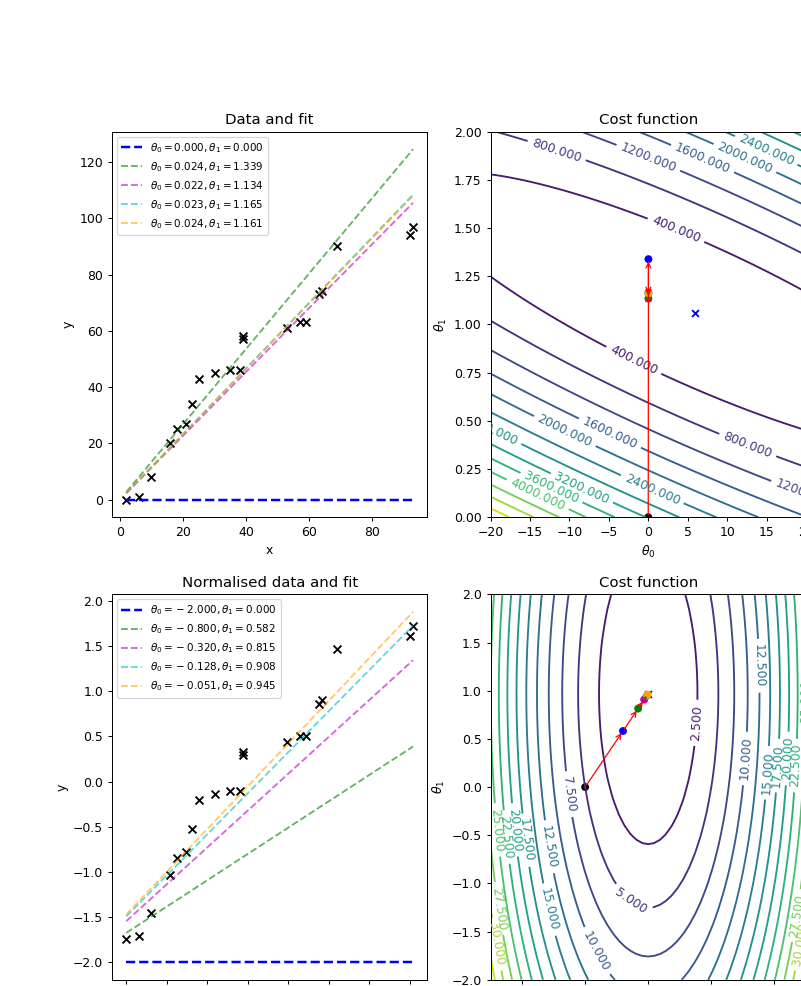

In [13]:
#Here, we use your gradient descent function to calculate optimal parameters
#for the regression you toyed with before.
#Based on: https://scipython.com/blog/visualizing-the-gradient-descent-method/ 


#set steps to take for original and normalised data. Feel free to change this to see more steps after you've run it once.
alphaXNotNormalised = 0.0005
stepsToTakeXNotNormalised = 5

alphaNormalised = 0.6
stepsToTakeNormalised = 5

startThetas = [[0,0]]

#set up 4 plots
figGradDescent, axGradDescent = plt.subplots(nrows = 2, ncols = 2, figsize=(10,12.3))
#colors for plotting gradient descent steps
colors = ['b', 'g', 'm', 'c', 'orange']

#scatterplot without normalised x values
axGradDescent[0,0].scatter(data["x"], data["y"], marker='x', s=40, color='k')
axGradDescent[0,0].set_ylabel("y")
axGradDescent[0,0].set_xlabel("x")

#we can reuse the contour plot values we calculated before
contours = axGradDescent[0,1].contour(X, Y, JVals,
                         levels = 15)
axGradDescent[0,1].clabel(contours)
axGradDescent[0,1].set_xlabel(r"$\theta_0$")
axGradDescent[0,1].set_ylabel(r"$\theta_1$")
minimum = axGradDescent[0,1].scatter(X[JVals == np.min(JVals)], Y[JVals == np.min(JVals)],
                      color = "blue", label = "minimum", marker = "x",
                      s = 30)


thetasXNotNorm = startThetas.copy()
JsGradientDescentXNotNorm = [MyMSE(data, thetasXNotNorm[-1])]
for step in range(0, stepsToTakeXNotNormalised):
    currentThetas = thetasXNotNorm[-1]
    newThetas     = np.array(gradientDescent(data, currentThetas, alphaXNotNormalised))
    newJ          = MyMSE(data, newThetas)
    
    thetasXNotNorm.append(newThetas)
    JsGradientDescentXNotNorm.append(newJ)


#make the plot of gradient descent steps:

#if stepsToTake > colors, repeat the colors
colors = colors * int(np.ceil(stepsToTakeXNotNormalised/len(colors)))

#plot initial regression line
axGradDescent[0,0].plot(data["x"], [univariateHypothesis(row["x"], thetasXNotNorm[0]) for index, row in data.iterrows()],
           color=colors[0], lw=2, linestyle = "dashed",
                        label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(thetasXNotNorm[0][0], thetasXNotNorm[0][1])) 

#plot regression lines for each update
for j in range(1,stepsToTakeXNotNormalised):
    axGradDescent[0,1].annotate('', xy=thetasXNotNorm[j], xytext=thetasXNotNorm[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    axGradDescent[0,0].plot(data["x"], [univariateHypothesis(row["x"], thetasXNotNorm[j]) for index, row in data.iterrows()],
               color=colors[j], lw=1.5, alpha = 0.6, linestyle = "dashed",
               label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*thetasXNotNorm[j]))

#add points in contour plot for different updated thetas
pointColors = colors.copy()
pointColors.insert(0, "black")
axGradDescent[0,1].scatter(*zip(*thetasXNotNorm), c=pointColors, s=40, lw=0)

# Labels, titles and a legend.
axGradDescent[0,1].set_xlabel(r'$\theta_0$')
axGradDescent[0,1].set_ylabel(r'$\theta_1$')
axGradDescent[0,1].set_title('Cost function')

axGradDescent[0,0].set_title('Data and fit')
axbox = axGradDescent[0,0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
if not stepsToTakeXNotNormalised > 10:
    axGradDescent[0,0].legend(fontsize='small')

##############################
##
##     with normalisation of x and y
##
##############################

#normalise and 0-center by subtracting the mean from every observation and dividing by the standard deviation.
mean        = data.mean() #you need to save these so you can use them to transform new samples you want to predict!
std         = data.std()
def transformationFunction(column):
    mean = np.mean(column)
    std  = np.std(column)
    newValues = (column - mean)/std
    return newValues

transformedDataFrame = data.transform(func = transformationFunction, axis = 0)

#calculate the contours of the cost function for this transformed data
theta0Vals1 = np.linspace(-5, 5, 55)
theta1Vals1 = np.linspace(-2, 2, 55)
X1, Y1 = np.meshgrid(theta0Vals1, theta1Vals1)

JVals1 = np.zeros((len(theta0Vals1), len(theta1Vals1)))
for i in range(0,len(theta0Vals1)):
    for j in range(0,len(theta1Vals1)):
        JVals1[i,j] = MyMSE(transformedDataFrame, np.array([X1[i,j], Y1[i,j]]))


#plotting, same as above
axGradDescent[1,0].scatter(transformedDataFrame["x"], transformedDataFrame["y"], marker='x', s=40, color='k')
axGradDescent[1,0].set_ylabel("y")
axGradDescent[1,0].set_xlabel("x")

#set up contour plot for normalised X data
contours = axGradDescent[1,1].contour(X1, Y1, JVals1,
                         levels = 15)
axGradDescent[1,1].clabel(contours)
axGradDescent[1,1].set_xlabel(r"$\theta_0$")
axGradDescent[1,1].set_ylabel(r"$\theta_1$")
minimum = axGradDescent[1,1].scatter(X1[JVals1 == np.min(JVals1)], Y1[JVals1 == np.min(JVals1)],
                      color = "blue", label = "minimum", marker = "x",
                      s = 30)




thetasNorm = [[-2, 0]]

JsGradientDescentNorm = [MyMSE(transformedDataFrame, thetasNorm[-1])]
for step in range(0, stepsToTakeNormalised):
    currentThetas = thetasNorm[-1]
    #even kijken niet op transformed data
    newThetas     = np.array(gradientDescent(transformedDataFrame, currentThetas, alphaNormalised))
    newJ          = MyMSE(transformedDataFrame, newThetas)
    thetasNorm.append(newThetas)
    JsGradientDescentNorm.append(newJ)


#make the plot of gradient descent steps:
#if stepsToTake > colors, repeat the colors
colors = colors * int(np.ceil(stepsToTakeNormalised/len(colors)))

#plot initial regression line
axGradDescent[1,0].plot(transformedDataFrame["x"],
                        [univariateHypothesis(row["x"], thetasNorm[0]) for index, row in transformedDataFrame.iterrows()],
                        color=colors[0], lw=2, linestyle = "dashed",
                        label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(thetasNorm[0][0], thetasNorm[0][1])) 

#plot regression lines for each update
for j in range(1,stepsToTakeNormalised):
    axGradDescent[1,1].annotate('', xy=thetasNorm[j], xytext=thetasNorm[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    axGradDescent[1,0].plot(transformedDataFrame["x"],
                            [univariateHypothesis(row["x"], thetasNorm[j]) for index, row in transformedDataFrame.iterrows()],
                            color=colors[j], lw=1.5, alpha = 0.6, linestyle = "dashed",
                            label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*thetasNorm[j]))

#add points in contour plot for different updated thetas
pointColors = colors.copy()
pointColors.insert(0, "black")
axGradDescent[1,1].scatter(*zip(*thetasNorm), c=pointColors, s=40, lw=0)

# Labels, titles and a legend.
axGradDescent[1,1].set_xlabel(r'$\theta_0$')
axGradDescent[1,1].set_ylabel(r'$\theta_1$')
axGradDescent[1,1].set_title('Cost function')

axGradDescent[1,0].set_title('Normalised data and fit')
axbox = axGradDescent[1,0].get_position()
if not stepsToTakeNormalised  > 10:
    axGradDescent[1,0].legend(
             fontsize='small')

figGradDescent.show()

What you can see above is that for non-normalised data (top row), gradient descent is having a hard time quickly finding a good estimate, and is jumping back and forth along the path to a good theta1. The new value for $\theta_1$ found by a gradient descent step is dependent on x, which is on a scale from 0-100, while $\theta_0$ is just dependent on the errors, which are on a much smaller scale. Because of this, $\theta_0$ almost doesn't change whereas $\theta_1$ quickly jumps all over the place if you don't normalise. Therefore, we are also forced to use a very low alpha (0.0005), and even then it's not perfect, as you still see jumps back and forth. <br> <br>

In the normalised case, this problem is much reduced, and with an alpha of 0.6 we quickly step towards the minimum of the cost function.

## What I'd like you to remember here:
* That you can implement ML requirements in Python yourself, and how to do it: this practical was chiefly focussed on implementing linear regression and gradient descent yourself. I hope it's given you an appreciation that this is not some mystical thing libraries do for you but something you can just _do yourself_.
* The partial derivatives we use in linear regression (and how we get them).
* That you're trying to minimise a cost function by evaluating it using training data, and then using its partial derivatives to take small steps in the direction of steepest descent of the cost function, and doing this until converging.
* How a contour plot or surface plot visualises the cost.

## The end
One practical down, many to go! Use your exuberant joy at having finished this practical to fill out the survey below!

## Survey
Did you like this practical? Did you hate it with a burning passion? Fill out [this survey](https://docs.google.com/forms/d/e/1FAIpQLSdTuTS3hZbQLprNO0DStD5v4xjP6JogbJPglMQ5xfNfZwMpkQ/viewform?usp=sf_link) and let us know!